In [1]:
import pandas as pd
import os 

In [2]:
os.getcwd()

'/Users/Glenn/Desktop/Projects/Python A-Z'

In [3]:
movies = pd.read_csv("Movie Ratings.csv")
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [4]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
movies.columns = ["Film", "Genre", "CriticRating", "AudienceRating", 
                  "BudgetMillions", "Year"]


In [6]:
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')

In [7]:
movies.head()


,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film = movies.Film.astype("category")

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [12]:
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [14]:
movies.Genre.cat.categories # tells us what levels these categories have

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Joint Plots

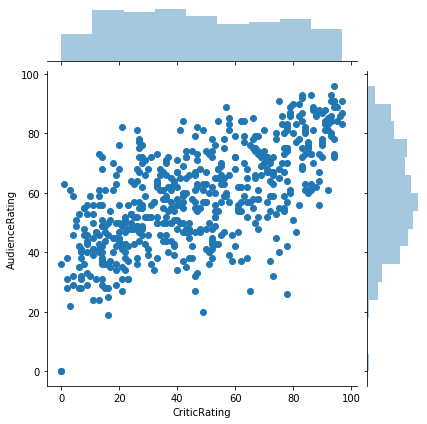

In [17]:
j = sns.jointplot(data=movies, x="CriticRating",
                  y="AudienceRating")
# JointPlot includes a scatterplot & histogram for both 
# variates

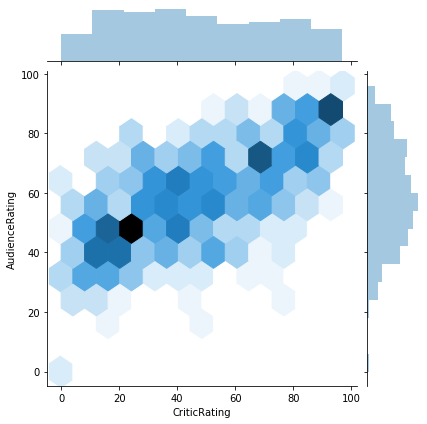

In [18]:
j = sns.jointplot(data=movies, x="CriticRating",
                  y="AudienceRating", kind="hex")

# Hexagonal type diagram is useful to pin-point the clusters
# of data points

In [19]:
#--------

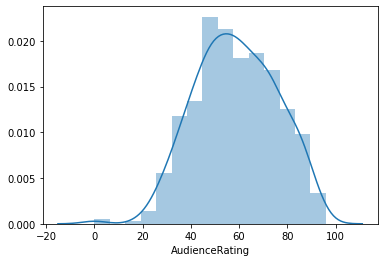

In [20]:
# Recall how to draw histograms using seaborn:
m1 = sns.distplot(movies.AudienceRating, bins=15)

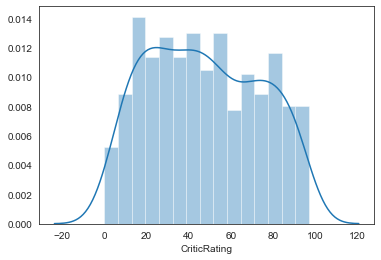

In [21]:
sns.set_style("white")
m2 = sns.distplot(movies.CriticRating, bins=15)
#seaborn histogram

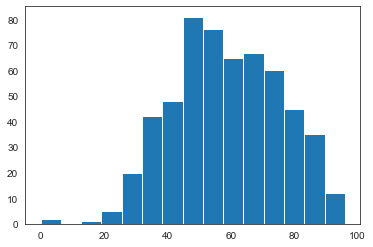

In [22]:
n1 = plt.hist(movies.AudienceRating, bins=15)
# pyplot histogram

In [23]:
# Stacked Histograms

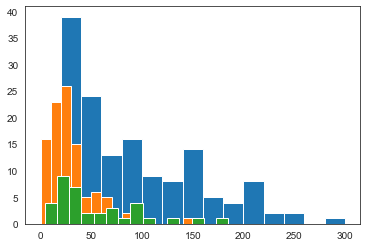

In [24]:
# First Method is Simply Hard Coding Each Histogram
plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions, bins=15)
plt.show()

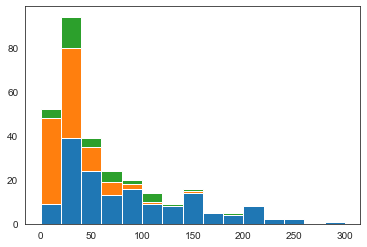

In [25]:
# Second Method is Passing A List To Plt.Hist Function 
# & Including Stacked = True
plt.hist([movies[movies.Genre == "Action"].BudgetMillions, 
         movies[movies.Genre == "Drama"].BudgetMillions, 
         movies[movies.Genre == "Thriller"].BudgetMillions], bins=15, stacked = True)
plt.show()

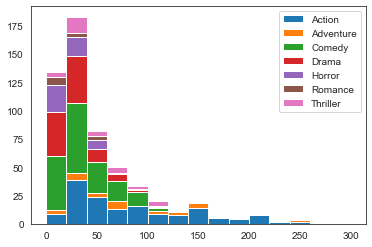

In [26]:
# Third Method - An Iterative Approach
list1 = list() # empty list
mylabels = list()
for gen in movies.Genre.cat.categories:
    # print(gen) to verify the genres are printed
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h = plt.hist(list1, bins=15, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()
    
    

In [27]:
# KDE Plot (Kernel Density Estimate)

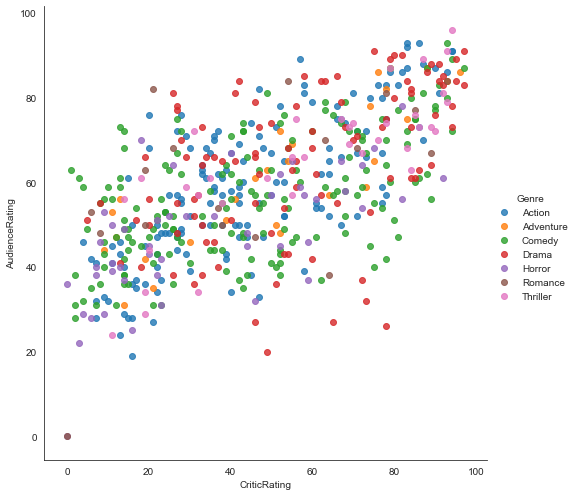

In [28]:
# Visualizing Audience Rating vs. Critic Rating
vis1 = sns.lmplot(data=movies, x="CriticRating", 
                  y="AudienceRating", fit_reg=False, hue="Genre",
                 size=7, aspect=1)

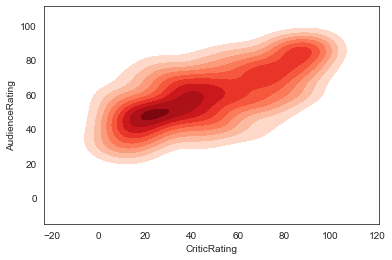

In [29]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, 
                 shade = True, shade_lowest=False, cmap="Reds")
# Provides a visualization of the concentration of data points

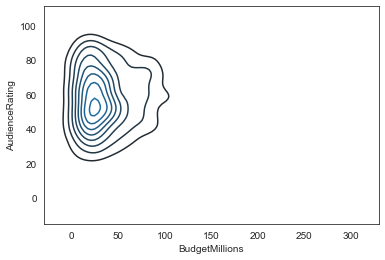

In [30]:
# Working with Subplots
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

[(-20, 160)]

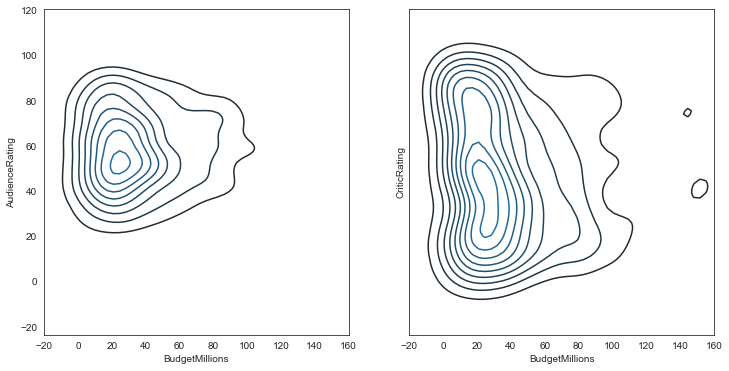

In [31]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True) # 1 Row 2 Columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))
# axes here is an array that stores both charts

In [32]:
# Violin Plots

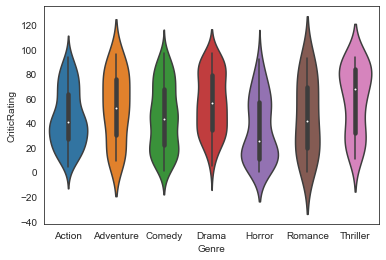

In [33]:
z = sns.violinplot(data = movies, 
                   x = "Genre", y = "CriticRating")

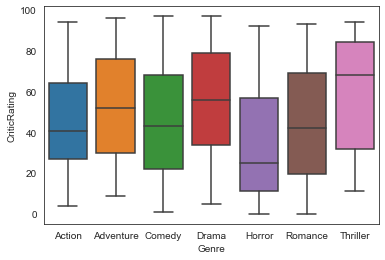

In [34]:
w = sns.boxplot(data=movies, x="Genre", y="CriticRating")

In [35]:
# Creating a Facet Grid


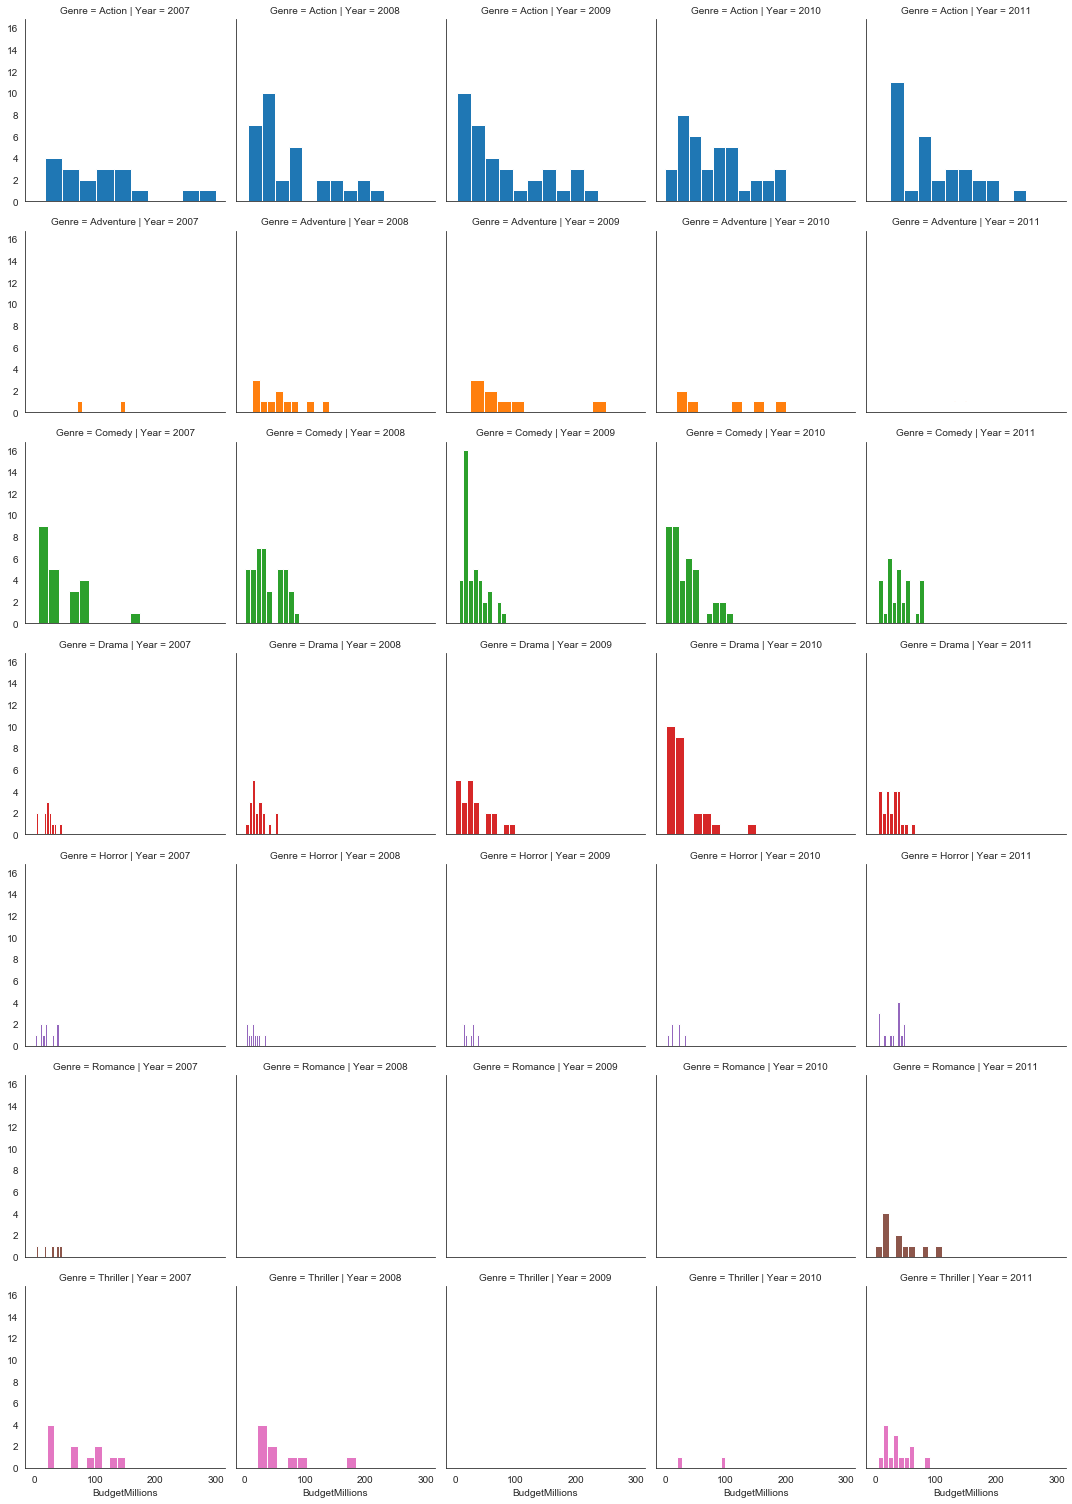

In [36]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.hist, "BudgetMillions")

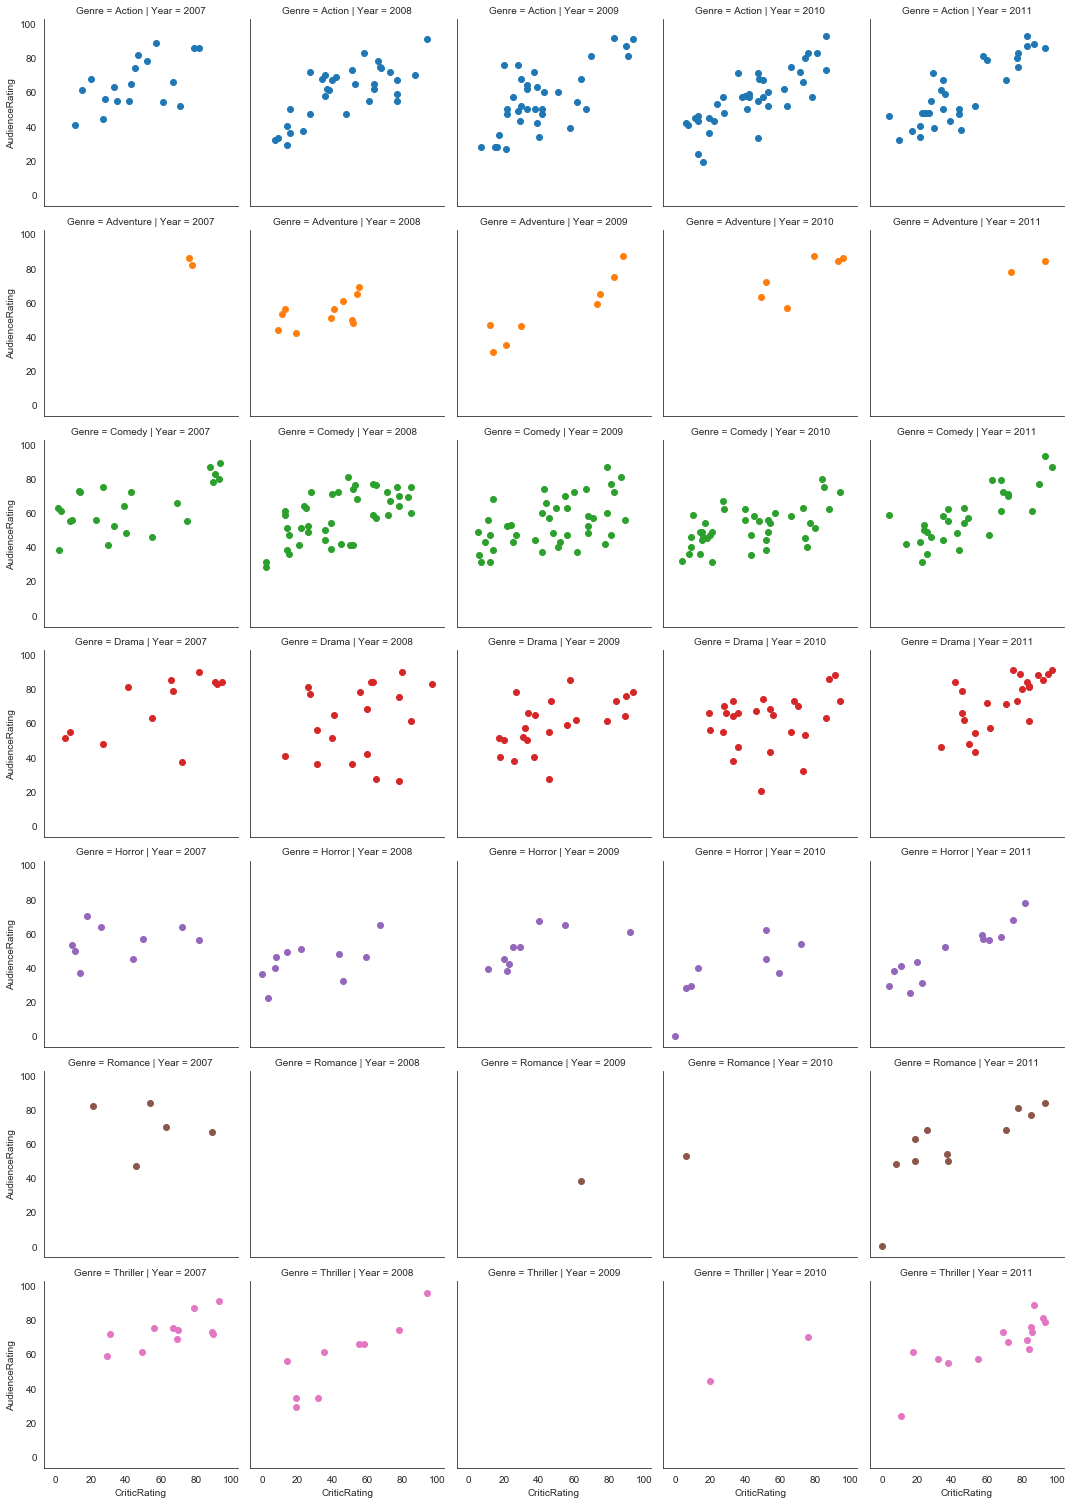

In [37]:
g2 = sns.FacetGrid(data=movies, row="Genre", col="Year", hue="Genre")
g2 = g2.map(plt.scatter, "CriticRating", "AudienceRating")

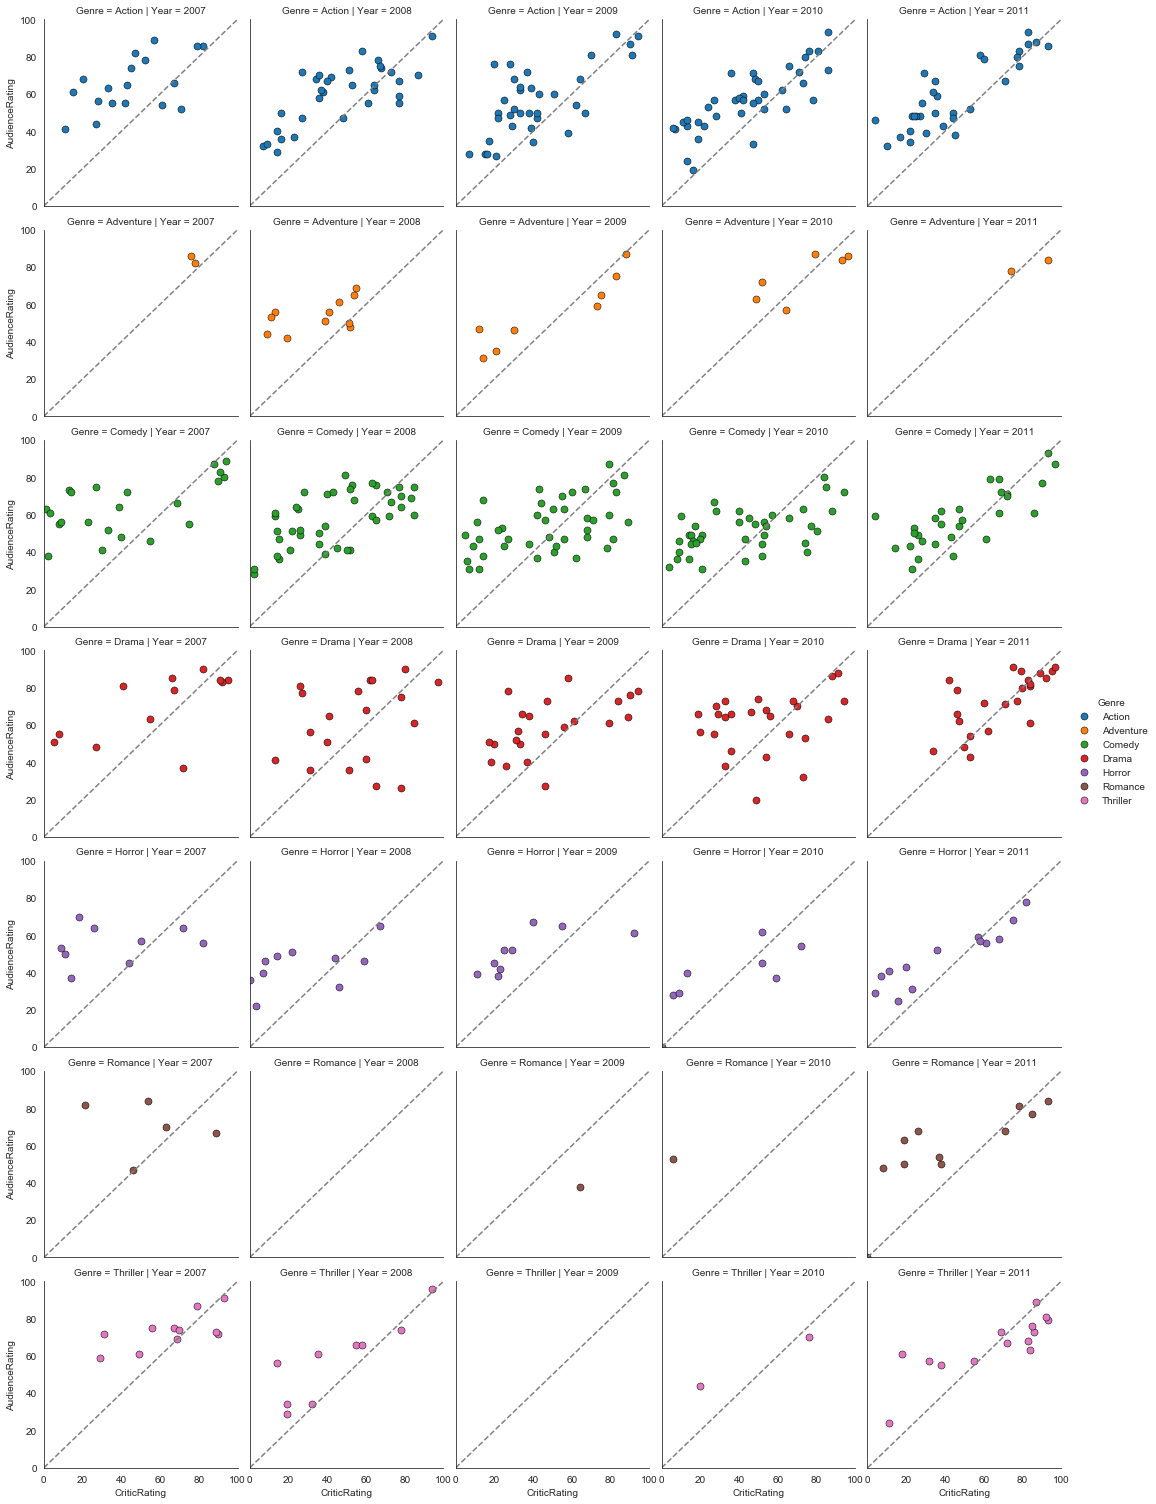

In [38]:
# Keyword Arguments for FacetGrids
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g2 = sns.FacetGrid(data=movies, row="Genre", col="Year", hue="Genre")
g2 = g2.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g2.set(xlim=(0, 100), ylim=(0, 100)) # Standardizing Axes

#g.axes is an array of the facet grids
# g.axes.flat allows us to iterate over the array columns ONLY
# the following loop allows us to add the line y=x to each plot
# in the facet grid
for ax in g2.axes.flat:
    ax.plot((0, 100), (0, 100), c="gray", ls="--")
g2.add_legend() #add a legend to the facet grid

In [39]:
# Building Dashboards

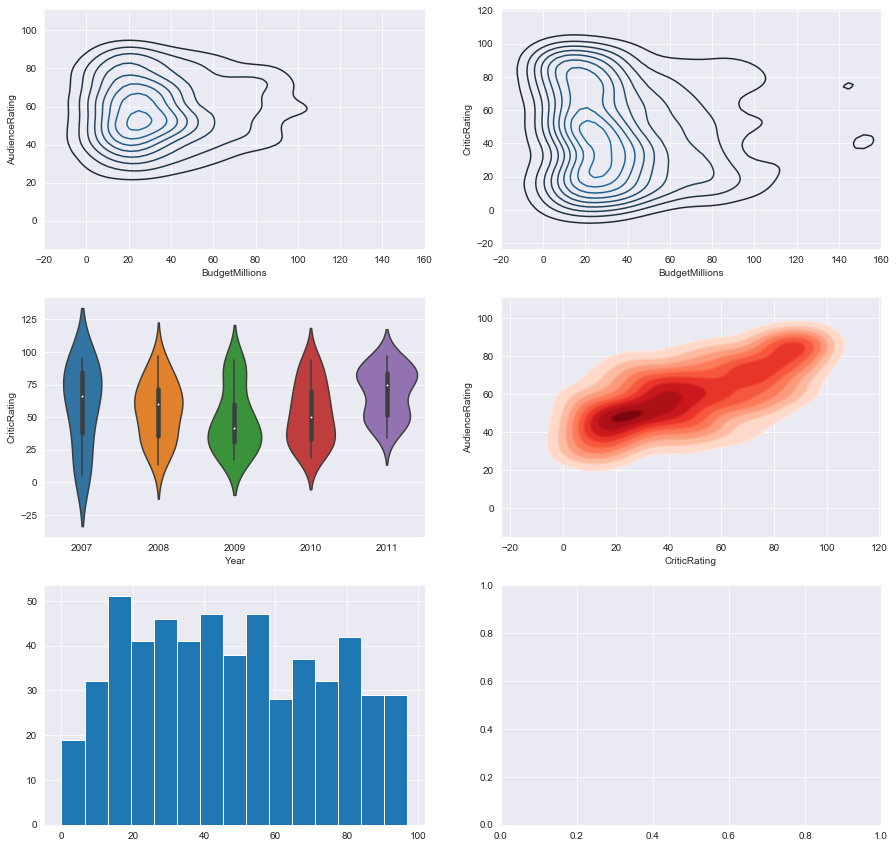

In [57]:
sns.set_style("darkgrid")
f, axes = plt.subplots(3, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1])
k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))
z = sns.violinplot(data=movies[movies.Genre=="Drama"], 
                  x="Year", y="CriticRating", ax=axes[1, 0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, 
                 shade=True, shade_lowest=False, cmap="Reds", ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, 
                cmap="Reds", ax=axes[1, 1])
# We can overlay several plots in the same location


# We can also add plots that are not part of the seaborn 
# library

axes[2, 0].hist(movies.CriticRating, bins=15)

plt.show()

